In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [1]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 5.3MB/s 
    100% |████████████████████████████████| 327kB 6.7MB/s 
    100% |████████████████████████████████| 3.2MB 8.2MB/s 
    100% |████████████████████████████████| 16.1MB 1.6MB/s 
  Running setup.py bdist_wheel for librosa ... - \ done
  Stored in directory: /root/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread ... - \ done
  Stored in directory: /root/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


In [0]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import glob
import re

import librosa
import librosa.display

from sklearn.preprocessing import LabelEncoder
import random
import cv2

In [0]:
%cd "/content/gdrive/My Drive/data/audio"

/content/gdrive/My Drive/data/audio


In [0]:
y, sr = librosa.load('04_11006_48_Sendhil_Aandavan.wav')

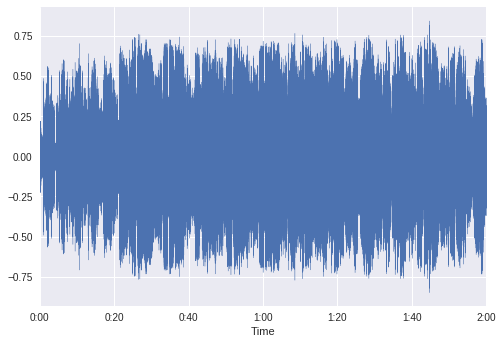

In [0]:
librosa.display.waveplot(y, sr)

In [0]:
from sklearn.decomposition import FastICA, PCA


In [0]:
y.shape

(2646000,)

In [0]:
import random

# Extract song names
songs = [re.search('.+?(?=\.wav)', x).group(0)
              for x in glob.iglob('*.wav')]
songs.sort()
random.Random(0).shuffle(songs)


In [0]:
D = []
for ind, song in enumerate(songs):
  y, sr = librosa.load(song + '.wav', offset = 30.0, duration = 30.0)
  with open('../annotations/meter/' + song + '.meter', 'r') as file:
        label = file.readline()
  mfcc =  librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
  flatness = librosa.feature.spectral_flatness(y=y)
  onset_env = librosa.onset.onset_strength(y, sr=sr)
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, aggregate=None)
  mfcc = mfcc.reshape(-1)
  flatness = flatness.reshape(-1)
  tempo = tempo.reshape(-1)
  arr = np.concatenate((mfcc, flatness, tempo))
  D.append((arr, label))
  if ind%10 == 0:
    print(ind)
  

0
10
20
30
40


KeyboardInterrupt: ignored

In [0]:
X_train, y_train = zip(*D[:102])
X_test, y_test = zip(*D[102:])

X_train = np.array(X_train)
X_test = np.array(X_test)




In [0]:
from sklearn import LabelEncoder

le = LabelEncoder()
_, labels = zip(*D)
le.fit(labels)

y_train = le.transform(y_train)
y_test = le.transform(y_test)